# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy import stats


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [90]:
# your code here
#'2018-08-01', '2018-10-30'
#ts_index = pd.date_range('2018-08-01', '2018-10-30')
ts_index = pd.date_range(start='8/1/2018', end='10/31/2018')
type(ts_index)

pandas.core.indexes.datetimes.DatetimeIndex

Generate the values for the wite noise process representing Nina's commute in August and September.

In [91]:
# your code here
trip_time = np.random.normal(loc=25,scale=4, size = len(ts_index))

Create a time series with the dates and the commute times.

In [92]:
# your code here
work = pd.Series(trip_time, index=ts_index)
work.describe()

count    92.000000
mean     24.437619
std       4.283443
min      12.410334
25%      22.044227
50%      24.558435
75%      27.017639
max      36.487278
dtype: float64

Visualize the time series and set appropriate axis labels.

Text(0.5, 1.0, 'Commuting time')

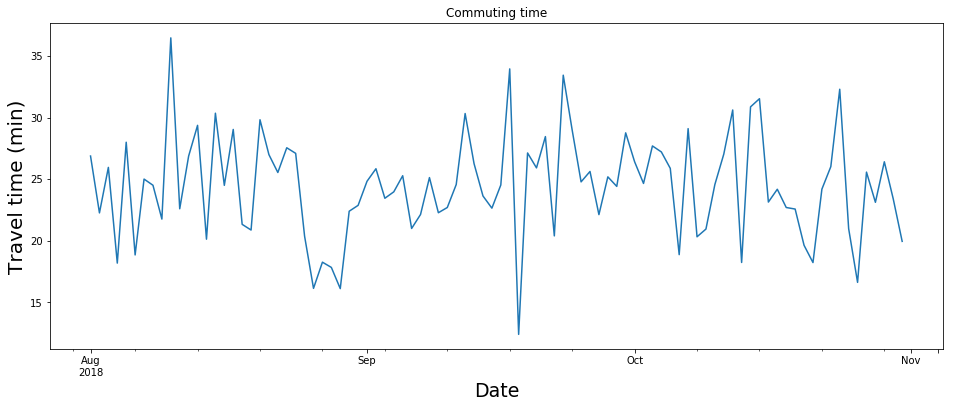

In [93]:
# your code here
ax = work.plot(figsize=(16,6)) #create an axis of our series. This access allows us to edit our plot much easier.
ax.set_ylabel('Travel time (min)', fontsize=20)
ax.set_xlabel('Date', fontsize=19)
ax.set_title('Commuting time')

Print Nina's shortest and longest commute.

In [94]:
# your code here
work.min(),work.max()

(12.41033391382408, 36.487277579955666)

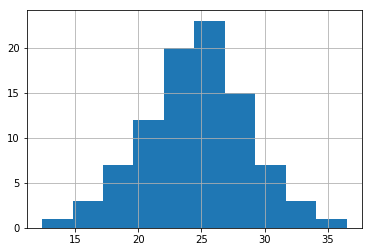

In [95]:
# your code here
work.hist()

Look at the distribution of commute times.

In [96]:
# your code here

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [97]:
# your code here
work.describe()

count    92.000000
mean     24.437619
std       4.283443
min      12.410334
25%      22.044227
50%      24.558435
75%      27.017639
max      36.487278
dtype: float64

In [98]:
# your code here
work.mean(), work.std()

(24.437618956728112, 4.283443280014909)

Now, let's look at the mean and standard error for August and October respectively. 

In [99]:
# your code here
aug = work['8-2018']
halloween = work['10-2018']
aug.describe(), halloween.describe()

(count    31.000000
 mean     24.010692
 std       4.725806
 min      16.125860
 25%      20.632219
 50%      24.511401
 75%      27.058410
 max      36.487278
 dtype: float64, count    31.000000
 mean     24.302794
 std       4.148224
 min      16.633235
 25%      20.978874
 50%      24.202691
 75%      26.739333
 max      32.315283
 dtype: float64)

Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong depencence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of november of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [103]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
ts_walk = pd.date_range('2010-1-1', '2010-11-30')

errors = np.random.normal(0,10,len(ts_walk))

def random_walk(start, error):
    Y_0 = start
    cum_err = np.cumsum(error)
    Y = Y_0 + cum_err
    return Y

share_values = random_walk(1000,errors)

rand_walk = pd.Series(share_values, index=ts_walk)
rand_walk.head()

2010-01-01    1017.494547
2010-01-02    1014.633817
2010-01-03    1009.788166
2010-01-04     983.254981
2010-01-05     983.172134
Freq: D, dtype: float64

Visualize the time series with correct axis labels

Text(0, 0.5, 'Stock Price (USD)')

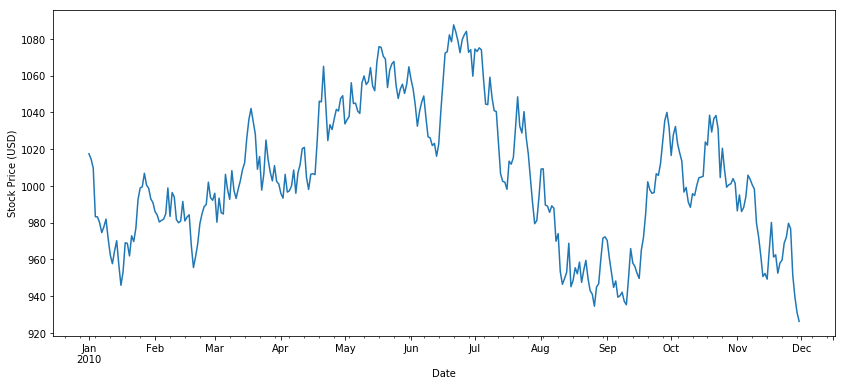

In [104]:
# your code here
ax = rand_walk.plot(figsize=(14,6))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price (USD)')

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

Text(0, 0.5, 'Stock Price (USD)')

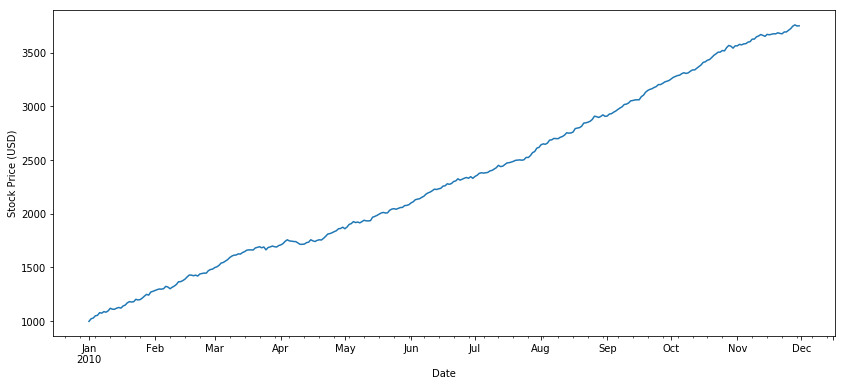

In [107]:
# keep the random seed
ts_rand_walk = pd.date_range('2010-1-1', '2010-11-30')

errors = np.random.normal(0,10,len(ts_walk))

def random_walk_error(start, error):
    Y_0 = start
    cum_err = np.cumsum(error + 8)
    Y = Y_0 + cum_err
    return Y

share_values_error = random_walk_error(1000,errors)

rand_walk_error = pd.Series(share_values_error, index=ts_rand_walk)

ax = rand_walk_error.plot(figsize=(14,6))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price (USD)')

In [ ]:
# your code here

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

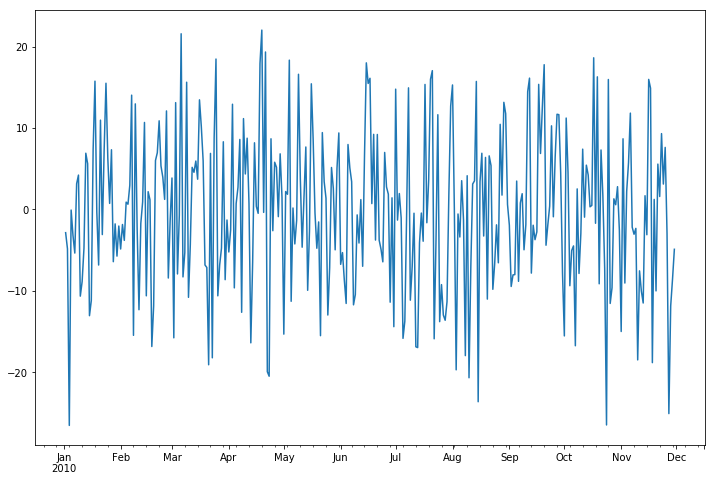

In [106]:
# your code here
diff = rand_walk.diff()
diff.plot(figsize=(12,8))

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

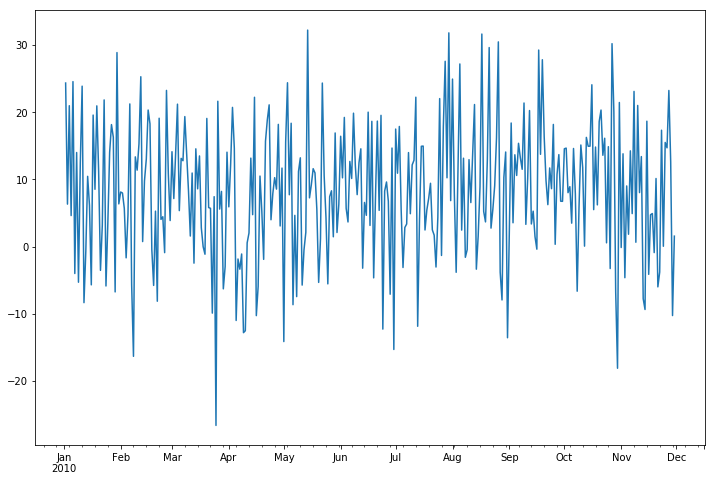

In [108]:
# your code here
diff_err = rand_walk_error.diff()
diff_err.plot(figsize=(12,8))

This is also a white noise series, but what can you tell about the mean?

In [112]:
diff_err.describe(), diff.describe()

(count    333.000000
 mean       8.262324
 std       10.040341
 min      -26.602828
 25%        2.020011
 50%        8.271764
 75%       14.694638
 max       32.208613
 dtype: float64, count    333.000000
 mean      -0.273775
 std        9.647649
 min      -26.533186
 25%       -6.844847
 50%       -0.310751
 75%        6.380315
 max       22.018563
 dtype: float64)

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!